In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#We do not select season 2016-17 due to it having no column: now_cost

clean_data = {}
seasons = ['2017-18','2018-19','2019-20','2020-21']

for year in seasons:
    clean_data[year] = pd.read_csv('data/' + year + '/cleaned_players.csv')

clean_frames=[]
for key, df in clean_data.items():
    df.sort_values('total_points',ascending=False,inplace=True)
    df['now_cost'] = df['now_cost']/10
    df['ppv'] = df['total_points']/df['now_cost']
    df['year'] = key[:4]
    clean_frames.append(df)

raw_data = {}

for year in seasons:
    raw_data[year] = pd.read_csv('data/' + year + '/players_raw.csv')

raw_frames=[]
for key, df in raw_data.items():
    df.sort_values('total_points',ascending=False,inplace=True)
    df['year'] = key[:4]
    raw_frames.append(df)


team_data = pd.read_csv('data/master_team_list.csv')
team_data['season'] = team_data['season'].map(lambda x: x[:4])
team_data.rename(columns ={'season':'year'},inplace=True)
team_data

,year,team,team_name
0,2016,1,Arsenal
1,2016,2,Bournemouth
2,2016,3,Burnley
3,2016,4,Chelsea
4,2016,5,Crystal Palace
...,...,...,...
95,2020,16,Southampton
96,2020,17,Spurs
97,2020,18,West Brom
98,2020,19,West Ham


In [24]:
#Concat Dataframes in List 
raw_result = pd.concat(raw_frames)
clean_result = pd.concat(clean_frames).drop(['element_type'],axis=1)
team_data

raw_result.columns
raw_result[['year','first_name','second_name','element_type','team']]
team_data.columns
join_1 = raw_result.join(team_data.set_index(['year','team']), on = ['year','team'])[['year','first_name','second_name','element_type','team_name']]
#join_1.columns
data=clean_result.merge(join_1,on=['year','first_name','second_name'])
#clean_result.join(join_1.set_index(['year','first_name','second_name']), on=['year','first_name','second_name']).reset_index()


def position_name(x):
    if x==1:
        return 'GK'
    elif x==2:
        return 'DEF'
    elif x==3:
        return 'MID'
    else:
        return 'FWD'


data['position']=data.apply(lambda x:position_name(x['element_type']),axis=1)
data['eff_ppv'] =  bn
#Join the raw and clean result 
#result = clean_result.join(raw_result, on = '') 

#Change year to INT
#result.year = result.year.astype('int64')

#result[result.year==2019].head(10)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,ppv,year,element_type,team_name,position
0,Mohamed,Salah,32,12,303,2905,29,942.5,1496.2,2109.0,...,15,0,1,56.7,10.6,28.584906,2017,3,Liverpool,MID
1,Raheem,Sterling,18,17,229,2584,23,838.2,969.8,1488.0,...,13,1,3,27.6,9.1,25.164835,2017,3,Man City,MID
2,Harry,Kane,29,2,217,3074,34,502.1,1214.4,2355.0,...,15,0,5,37.7,13.1,16.564885,2017,4,Spurs,FWD
3,Kevin,De Bruyne,8,18,209,3073,22,1744.2,1146.6,797.0,...,19,0,2,21.4,10.3,20.291262,2017,3,Man City,MID
4,Christian,Eriksen,11,10,199,3218,33,1487.0,1072.6,1021.0,...,17,0,0,19.4,9.7,20.515464,2017,3,Spurs,MID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,Harry,Wilson,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0.0,5.1,0.000000,2020,3,Liverpool,MID
2650,Hugo,Bueno,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0.0,4.0,0.000000,2020,2,Wolves,DEF
2651,Neil,Taylor,0,0,-1,15,2,0.7,0.8,0.0,...,0,0,1,0.2,4.2,-0.238095,2020,2,Aston Villa,DEF
2652,Alexandre,Jankewitz,0,0,-1,2,9,0.3,4.4,0.0,...,0,1,0,0.0,4.5,-0.222222,2020,3,Southampton,MID


In [73]:
f1_data = data[data.minutes>1000]
df1 = f1_data.groupby(by=['year','position']).head(20)
df1.groupby(by=['year','position']).agg(['mean','std'])['ppv']


mean       std
year position                     
2017 DEF       22.492828  1.596054
     FWD       16.992698  2.988986
     GK        24.616701  5.794819
     MID       21.378400  4.246464
2018 DEF       26.180821  3.423149
     FWD       19.730374  3.836629
     GK        24.484566  5.414909
     MID       21.705685  3.083273
2019 DEF       25.201411  2.927116
     FWD       19.348931  4.174494
     GK        24.467299  5.263908
     MID       20.535416  2.625203
2020 DEF       24.202952  2.911909
     FWD       18.779839  4.410978
     GK        25.448558  4.362823
     MID       21.559419  5.046416

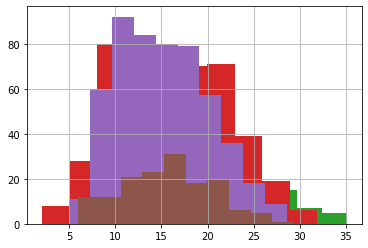

In [41]:
position = ['GK','DEF','MID','FWD']
years = [2017,2018,2019,2020]

for x in years:
    for x in position:
        f1_data.loc[f1_data.position==x].ppv.hist()
    

In [ ]:
df_2021 = pd.read_csv('data/2020-21/cleaned_players.csv')

In [ ]:
df_2021 = df_2021.sort_values('total_points',ascending=False)

In [ ]:
df_2021['now_cost'] = df_2021['now_cost']/10
df_2021['ppv'] = df_2021['total_points']/df_2021['now_cost']

In [ ]:
df_2021_gk = df_2021.loc[(df_2021.element_type=='GK') & (df_2021.minutes>500)].sort_values('ppv',ascending=False)
df_2021_def = df_2021.loc[(df_2021.element_type=='DEF') & (df_2021.minutes>500)].sort_values('ppv',ascending=False)
df_2021_mid = df_2021.loc[(df_2021.element_type=='MID') & (df_2021.minutes>500)].sort_values('ppv',ascending=False)
df_2021_fwd = df_2021.loc[(df_2021.element_type=='FWD') & (df_2021.minutes>500)].sort_values('ppv',ascending=False)

In [ ]:
df_2021_gk.head(10)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
34,Emiliano,Martínez,0,0,186,3420,46,20.0,1067.2,0.0,27,825,108.5,15,0,1,37.9,5.3,GK,35.094340
333,Illan,Meslier,0,0,154,3150,52,10.0,1026.0,0.0,20,774,103.7,11,0,0,8.5,4.8,GK,32.083333
614,Sam,Johnstone,0,1,140,3330,74,10.0,1213.6,0.0,19,768,122.4,6,0,1,3.0,4.6,GK,30.434783
266,Alphonse,Areola,0,0,124,3240,48,0.0,876.2,0.0,9,637,87.4,9,0,2,4.7,4.5,GK,27.555556
515,Aaron,Ramsdale,0,0,123,3420,63,20.0,1023.0,4.0,12,685,104.7,5,0,1,2.0,4.6,GK,26.739130
567,Hugo,Lloris,0,0,149,3420,45,0.0,868.0,0.0,13,702,86.7,12,0,0,6.6,5.6,GK,26.607143
644,Lukasz,Fabianski,0,0,133,3150,44,0.0,745.2,0.0,11,634,74.4,10,0,2,3.2,5.0,GK,26.600000
165,Edouard,Mendy,0,0,140,2745,25,0.0,470.2,0.0,8,613,47.2,16,0,2,10.9,5.3,GK,26.415094
398,Ederson,Santana de Moraes,0,1,160,3240,28,10.0,586.0,0.0,3,696,59.6,19,0,3,9.4,6.1,GK,26.229508
7,Bernd,Leno,0,0,131,3131,37,0.0,702.2,2.0,11,625,70.3,11,1,0,7.3,5.0,GK,26.200000


In [ ]:
df_2021_def.head(10)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
320,Stuart,Dallas,8,3,171,3410,53,454.6,756.8,527.0,15,726,174.2,12,0,7,33.1,5.5,DEF,31.090909
49,Matt,Targett,0,4,138,3404,44,607.0,690.4,122.0,9,710,142.2,16,0,7,12.0,5.0,DEF,27.600000
76,Lewis,Dunk,5,0,130,2932,40,136.7,720.4,443.0,17,626,130.2,11,2,5,5.9,4.8,DEF,27.083333
648,Aaron,Cresswell,0,11,153,3170,41,898.6,669.4,96.0,21,730,166.8,11,0,3,18.2,5.7,DEF,26.842105
665,Vladimir,Coufal,0,9,128,3054,43,670.9,693.8,220.0,12,625,158.7,9,0,3,8.6,4.8,DEF,26.666667
53,Ezri,Konsa Ngoyo,2,0,119,3195,46,34.2,695.6,276.0,8,580,101.0,12,0,3,6.2,4.6,DEF,25.869565
210,Michael,Keane,3,1,127,2989,43,87.8,814.0,243.0,13,649,114.5,11,0,4,6.3,5.0,DEF,25.400000
393,John,Stones,4,0,128,1933,12,79.8,520.0,192.0,11,531,79.0,14,1,0,9.7,5.1,DEF,25.098039
321,Ezgjan,Alioski,2,3,110,2456,35,423.0,477.8,281.0,7,449,118.5,10,0,7,3.2,4.4,DEF,25.000000
443,Aaron,Wan-Bissaka,2,5,144,3060,36,498.2,785.4,159.0,11,729,144.1,13,0,3,18.8,5.8,DEF,24.827586


In [ ]:
df_2021_mid.head(20)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
323,Jack,Harrison,8,10,160,2846,45,821.7,759.2,666.0,15,542,225.2,11,0,2,7.6,5.6,MID,28.571429
391,Ilkay,Gündogan,13,4,157,2025,16,688.4,754.6,712.0,22,620,215.7,12,0,1,17.1,5.5,MID,28.545455
625,Matheus,Pereira,11,7,153,2574,58,873.6,744.0,661.0,15,565,227.9,6,1,2,5.0,5.4,MID,28.333333
661,Tomas,Soucek,10,2,147,3420,47,271.1,889.8,925.0,16,555,208.8,11,1,7,11.2,5.2,MID,28.269231
542,James,Ward-Prowse,8,7,156,3420,68,971.2,940.0,355.0,17,772,226.5,9,0,5,11.7,5.9,MID,26.440678
658,Jarrod,Bowen,8,6,141,2556,33,493.5,529.8,812.0,8,434,183.7,9,0,0,2.5,5.8,MID,24.310345
145,Jorge Luiz,Frello Filho,7,2,114,2006,17,383.5,588.8,175.0,15,485,114.9,14,0,2,4.7,4.7,MID,24.255319
83,Leandro,Trossard,5,6,132,2602,30,725.1,543.4,759.0,15,406,202.8,12,0,2,1.8,5.5,MID,24.000000
574,Heung-Min,Son,17,11,228,3119,36,1049.9,1052.2,1046.0,26,777,315.2,13,0,0,44.2,9.6,MID,23.750000
341,Raphael,Dias Belloli,6,10,133,2358,34,889.3,719.6,902.0,11,489,251.3,9,0,3,9.4,5.6,MID,23.750000


In [ ]:
df_2021_mid[df_2021_mid.second_name=='Salah']

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
363,Mohamed,Salah,22,6,231,3077,41,825.7,1056.0,1980.0,21,657,385.8,11,0,0,43.6,12.9,MID,17.906977


In [ ]:
df_2021_fwd.head(10)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
322,Patrick,Bamford,17,11,194,3052,50,371.0,867.2,1512.0,26,631,274.6,10,0,3,45.2,6.6,FWD,29.393939
62,Ollie,Watkins,14,9,168,3328,46,610.4,815.4,1721.0,18,531,314.0,14,1,2,22.1,6.3,FWD,26.666667
548,Che,Adams,9,7,137,2662,51,488.6,581.8,964.0,16,443,203.4,7,0,1,4.1,5.7,FWD,24.035088
218,Dominic,Calvert-Lewin,16,6,165,2871,39,308.0,745.8,1439.0,21,528,249.0,11,0,3,29.5,7.5,FWD,22.000000
120,Chris,Wood,12,3,138,2741,43,323.2,595.8,1129.0,16,395,204.0,9,0,0,5.6,6.6,FWD,20.909091
490,Callum,Wilson,12,6,134,2081,37,230.4,557.4,761.0,22,409,154.7,5,0,2,5.1,6.5,FWD,20.615385
572,Harry,Kane,23,14,242,3083,39,659.1,1318.2,1585.0,40,880,355.9,12,0,1,44.5,11.9,FWD,20.336134
177,Christian,Benteke,10,2,106,1808,34,236.5,512.6,1030.0,14,338,177.7,5,1,1,1.3,5.5,FWD,19.272727
497,David,McGoldrick,8,1,100,2391,37,320.2,464.4,860.0,12,344,164.6,9,0,7,1.3,5.2,FWD,19.230769
286,Jamie,Vardy,15,14,187,2838,44,356.6,819.2,1306.0,23,649,248.3,8,0,1,17.5,10.2,FWD,18.333333
